In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Comments\\FinalCsvFiles\\Comments_2017_2020.csv"

In [2]:
data=pd.read_csv(input_path,names=["RowId","CreateDate","PostId","Score","UserId"])
data.head()

,RowId,CreateDate,PostId,Score,UserId
0,70028700,2017-01-01T00:00:36.010,41412408,0,7123245
1,70028701,2017-01-01T00:00:24.143,41305580,0,218196
2,70028706,2017-01-01T00:01:42.053,41412354,0,743464
3,70028707,2017-01-01T00:01:51.007,11215592,2,1244126
4,70028708,2017-01-01T00:01:56.537,41305580,0,218196


In [4]:
len(data)

29857733

In [5]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
    print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
    print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
    print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
    print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
    print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
    print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [6]:
yearly_monthly_comments=getYearlyMonthlyCreation(data)

      RowId              CreateDate    PostId  Score   UserId
0  70028700 2017-01-01 00:00:36.010  41412408      0  7123245
1  70028701 2017-01-01 00:00:24.143  41305580      0   218196
2  70028706 2017-01-01 00:01:42.053  41412354      0   743464
3  70028707 2017-01-01 00:01:51.007  11215592      2  1244126
4  70028708 2017-01-01 00:01:56.537  41305580      0   218196
      RowId              CreateDate    PostId  Score   UserId  CreateYear
0  70028700 2017-01-01 00:00:36.010  41412408      0  7123245        2017
1  70028701 2017-01-01 00:00:24.143  41305580      0   218196        2017
2  70028706 2017-01-01 00:01:42.053  41412354      0   743464        2017
3  70028707 2017-01-01 00:01:51.007  11215592      2  1244126        2017
4  70028708 2017-01-01 00:01:56.537  41305580      0   218196        2017
      RowId              CreateDate    PostId  Score   UserId  CreateYear  \
0  70028700 2017-01-01 00:00:36.010  41412408      0  7123245        2017   
1  70028701 2017-01-01 00:00:2

In [14]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

Text(0, 0.5, 'Comment Creations')

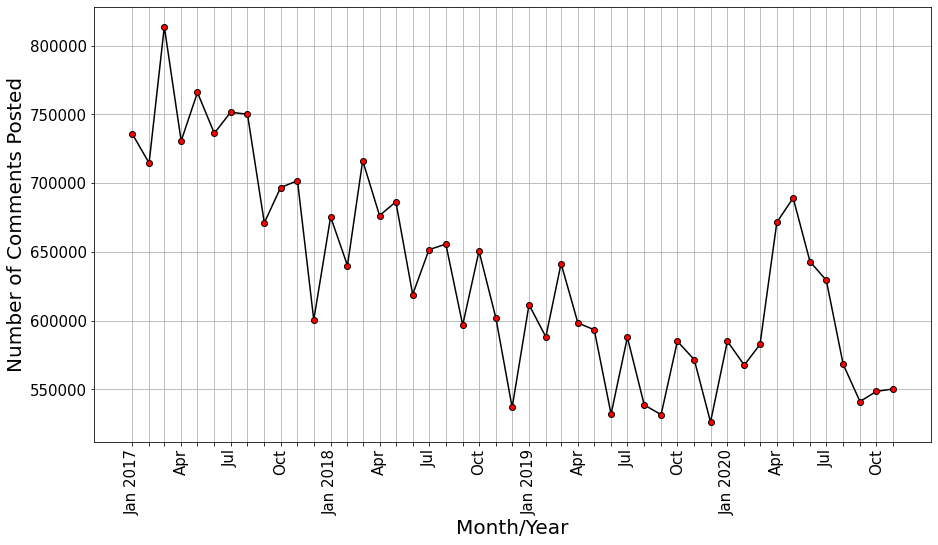

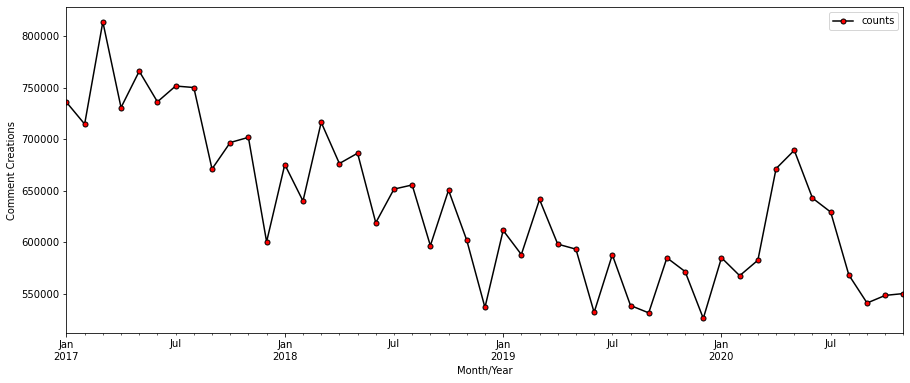

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_comments['CreateYearMonth'],yearly_monthly_comments['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_comments['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Number of Comments Posted',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_CommentCreationYearltMonthly.pdf',bbox_inches='tight')
# plt.grid()

yearly_monthly_comments.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.xlabel('Month/Year')
plt.ylabel('Comment Creations')

In [8]:
data.head()

,RowId,CreateDate,PostId,Score,UserId,CreateYear,CreateMonth,CreateYearMonth
0,70028700,2017-01-01 00:00:36.010,41412408,0,7123245,2017,1,2017-01-01
1,70028701,2017-01-01 00:00:24.143,41305580,0,218196,2017,1,2017-01-01
2,70028706,2017-01-01 00:01:42.053,41412354,0,743464,2017,1,2017-01-01
3,70028707,2017-01-01 00:01:51.007,11215592,2,1244126,2017,1,2017-01-01
4,70028708,2017-01-01 00:01:56.537,41305580,0,218196,2017,1,2017-01-01


In [9]:
data_2017=data[data["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

8669683

In [10]:
data_2018=data[data["CreateYear"]==2018]
len(data_2018)

7706953

In [11]:
data_2019=data[data["CreateYear"]==2019]
len(data_2019)

6905108

In [12]:
data_2020=data[data["CreateYear"]==2020]
len(data_2020)

6575989